In [1]:
!pip install pyspark

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

26/02/16 22:35:56 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 192.168.0.215 instead (on interface enp0s3)
26/02/16 22:35:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/16 22:35:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/admin01/hadoop/input/economic_data/GDP.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)

+-------+----+-----+----------------+--------+--------+------+-------------+------------------+------------+------------+------------+--------------+-------------+-----------+---------+------------+-----------------------+--------------+---------+------------+----+-----+
|Country|Year|  GDP|Urban_population|Industry|Business|Mining|Manufacturing|Electricity_supply|Water_supply|Construction|Retail trade|Transportation|Accommodation|Information|Financial|Real estate |Professional_scientific|Administrative|Education|Human_health|Arts|Other|
+-------+----+-----+----------------+--------+--------+------+-------------+------------------+------------+------------+------------+--------------+-------------+-----------+---------+------------+-----------------------+--------------+---------+------------+----+-----+
|Austria|2010|35390|            57.4|    24.0|    25.2|  18.3|         24.4|              23.6|        12.2|         9.9|        27.5|           7.3|          9.9|       21.2|     30.3

In [5]:
pandas_df = df.toPandas()
pandas_df.head()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
0,Austria,2010,35390,57.40,24.0,25.2,18.3,24.4,23.6,12.2,...,9.9,21.2,30.3,27.0,34.0,22.5,27.8,12.0,34.0,32.0
1,Austria,2015,36140,57.72,21.8,23.4,13.7,22.7,17.6,9.3,...,6.4,22.4,30.3,28.0,31.3,20.0,24.2,12.9,26.2,28.3
2,Austria,2016,36390,57.91,20.8,22.3,14.4,21.9,13.2,8.2,...,5.9,20.9,27.1,28.7,30.4,17.8,24.3,14.5,20.8,27.8
3,Austria,2017,36980,58.09,20.7,22.3,10.9,21.7,13.0,8.4,...,5.7,20.6,28.4,29.0,29.4,17.4,23.7,15.0,19.1,26.9
4,Austria,2018,37690,58.30,20.4,22.0,7.9,21.4,14.4,8.1,...,5.4,20.7,28.2,29.2,28.3,17.1,23.6,15.3,18.3,26.4


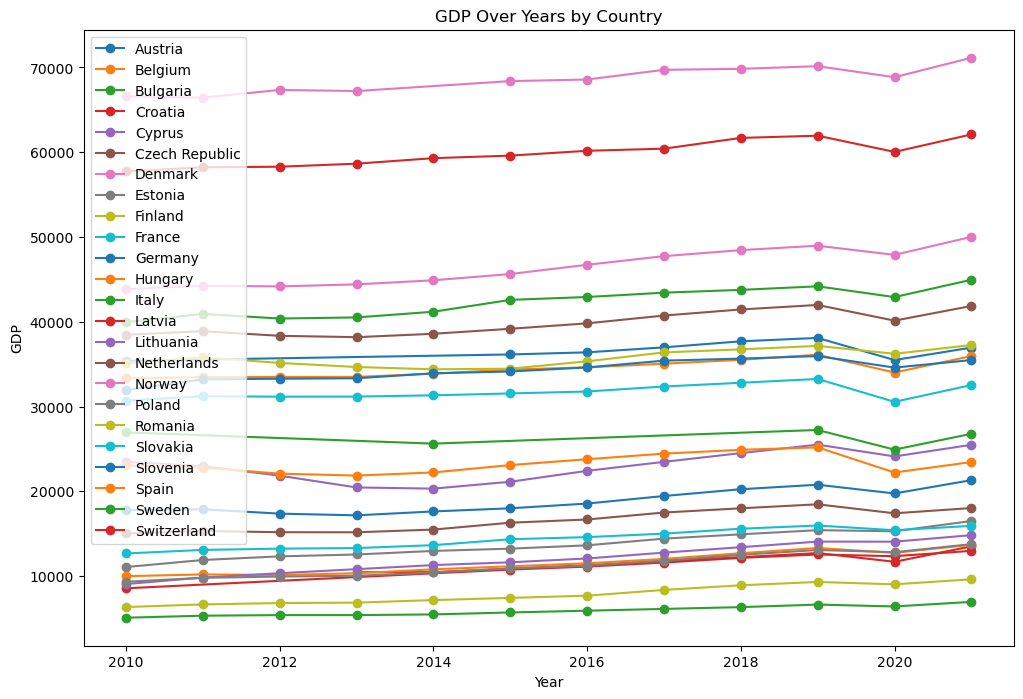

,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,...,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2015.674157,26765.917603,72.879101,14.585019,16.684270,10.464794,19.172659,11.958052,2.542697,0.011610,...,10.307865,19.781273,28.531461,12.131835,18.849813,7.040449,11.697004,18.673034,17.090637,16.375655
std,3.483933,16594.623150,12.248818,5.645432,5.053374,12.723386,6.803292,7.049383,8.338770,11.515311,...,4.792182,6.512939,7.519487,10.625204,7.752460,11.576614,6.192124,7.750810,11.442880,10.287157
min,2010.000000,5080.000000,52.660000,0.900000,5.400000,-26.100000,1.700000,-2.000000,-24.600000,-28.300000,...,0.400000,7.300000,4.900000,-47.900000,-1.800000,-33.200000,-1.700000,-6.800000,-0.200000,-11.900000
25%,2013.000000,12720.000000,66.810000,11.300000,13.600000,4.700000,13.800000,7.950000,-2.100000,-8.400000,...,6.950000,14.350000,23.400000,8.400000,14.650000,5.400000,7.850000,13.550000,10.150000,10.700000
50%,2016.000000,22970.000000,73.480000,15.200000,16.200000,12.500000,20.500000,11.500000,2.800000,2.800000,...,9.300000,19.000000,29.800000,13.800000,19.000000,9.000000,11.300000,19.000000,14.400000,16.600000
75%,2019.000000,36385.000000,81.165000,18.400000,20.000000,16.850000,24.300000,17.200000,7.950000,8.550000,...,12.600000,25.450000,33.500000,18.350000,23.750000,13.950000,15.100000,24.350000,20.250000,22.350000
max,2021.000000,71150.000000,98.120000,29.900000,30.200000,43.700000,33.600000,49.200000,18.800000,23.500000,...,27.700000,33.400000,45.100000,36.400000,36.200000,26.200000,36.000000,37.600000,68.600000,48.100000


In [6]:
# Отображение статистики числовых полей
summary_statistics = pandas_df.describe()

# Визуализация ВВП (GDP) по годам для каждой страны
plt.figure(figsize=(12, 8))
for country in pandas_df['Country'].unique():
    country_data = pandas_df[pandas_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker='o', label=country)

plt.title('GDP Over Years by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

summary_statistics

In [7]:
pandas_df['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Hungary', 'Italy', 'Latvia', 'Lithuania',
       'Netherlands', 'Norway', 'Poland', 'Romania', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland'], dtype=object)

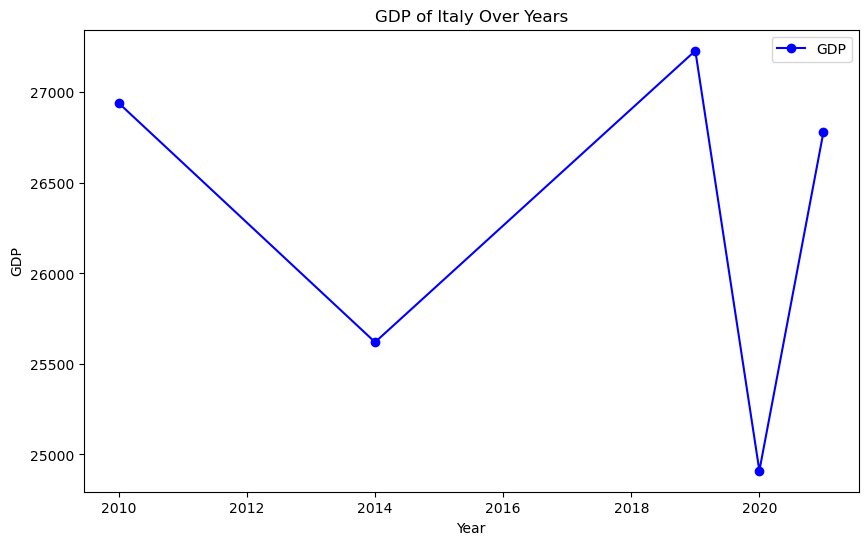

,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,...,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,2016.800000,26296.000000,70.146000,5.060000,15.000000,-3.260000,14.920000,10.440000,3.04000,4.94000,...,9.520000,16.600000,22.680000,18.340000,24.340000,7.700000,8.820000,24.32000,54.140000,13.300000
std,4.658326,987.334796,1.291019,0.709225,1.770593,7.988617,1.953714,1.270039,1.89156,3.98221,...,1.769746,1.721918,0.729383,7.509527,2.003247,2.319483,2.193627,3.75992,19.231563,4.656716
min,2010.000000,24910.000000,68.330000,4.200000,13.100000,-15.200000,13.100000,8.200000,0.70000,-0.60000,...,8.300000,14.800000,21.700000,12.700000,21.100000,4.400000,7.200000,21.00000,20.400000,10.100000
25%,2014.000000,25620.000000,69.270000,4.700000,13.800000,-5.200000,13.200000,10.700000,1.30000,3.20000,...,8.500000,15.600000,22.400000,12.700000,23.900000,7.000000,7.600000,21.40000,58.300000,10.200000
50%,2019.000000,26780.000000,70.740000,5.000000,14.700000,-2.600000,14.600000,11.000000,4.00000,5.00000,...,8.500000,15.800000,22.700000,13.300000,24.900000,7.900000,7.900000,22.40000,61.300000,11.600000
75%,2020.000000,26940.000000,71.040000,5.300000,15.800000,0.100000,16.000000,11.000000,4.50000,7.20000,...,9.800000,17.900000,22.900000,25.200000,25.600000,8.400000,8.800000,28.30000,62.100000,13.300000
max,2021.000000,27230.000000,71.350000,6.100000,17.600000,6.600000,17.700000,11.300000,4.70000,9.90000,...,12.500000,18.900000,23.700000,27.800000,26.200000,10.800000,12.600000,28.50000,68.600000,21.300000


In [8]:
# Фильтрация данных только для Italy
Italy_data = pandas_df[pandas_df['Country'] == 'Italy']

# Отображение статистики для Italy
Italy_summary_statistics = Italy_data.describe()

# Визуализация ВВП (GDP) для Italy по годам
plt.figure(figsize=(10, 6))
plt.plot(Italy_data['Year'], Italy_data['GDP'], marker='o', linestyle='-', color='b', label='GDP')
plt.title('GDP of Italy Over Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

Italy_summary_statistics

In [9]:
# Преобразование Pandas DataFrame обратно в PySpark DataFrame
italy_data_spark = spark.createDataFrame(Italy_data)


In [10]:
# Путь в HDFS для сохранения
file_path_hdfs = "hdfs://localhost:9000/user3/hadoop/economic_data/Italy_data6.csv"

# Сохранение DataFrame в формате CSV в HDFS
italy_data_spark.write.csv(file_path_hdfs, header=True, mode='overwrite')

In [ ]:
#Ошибка org.apache.hadoop.security.AccessControlException: 
# Permission denied указывает на то, что текущий пользователь (devops) не имеет прав на запись в указанный каталог HDFS (/user2/hadoop/economic_data).

Изменение прав доступа к каталогу:

Используйте команду hdfs dfs -chmod для изменения прав доступа и разрешения записи для нужного пользователя:
hdfs dfs -chmod 777 /user2/hadoop/economic_data

In [1]:
!ls

data  work_with_data_2024.ipynb
